In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
#sklearn
import sklearn
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# for scaling the data
from sklearn.preprocessing import scale
# for evaluating the model
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import confusion_matrix,classification_report
# techniques used to handling imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#!pip install pandas_profiling
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 118.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a99e21ed9c8621357e9be1a21888b72f84ee98749429833e314f7a74281bedbd
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attem

<ipython-input-3-693a792fb868>:32: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
#read csv file
file=pd.read_csv("/content/drive/MyDrive/AI/final/diabetes_prediction_dataset.csv")
file

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0.0,0.0,No Info,27.32,6.2,90.0,0.0
99996,Female,2.0,0.0,0.0,No Info,17.37,6.5,100.0,0.0
99997,Male,66.0,0.0,0.0,former,27.83,5.7,155.0,0.0
99998,Female,24.0,0.0,0.0,never,35.42,4.0,100.0,0.0


In [ ]:
file = file.dropna()
file.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
file = file[file['smoking_history'] != 'No Info']

In [ ]:
file["diabetes"].value_counts()

0.0    57111
1.0     7041
Name: diabetes, dtype: int64

In [ ]:
# Generate the pandas profiling report.
profile = pandas_profiling.ProfileReport(file)

# Save the report as a HTML file.
profile.to_file('data_profile.html')

# Open the report in a web browser.
open('data_profile.html', 'r')

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<_io.TextIOWrapper name='data_profile.html' mode='r' encoding='UTF-8'>

In [ ]:
#Show values that null in csv file
file.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

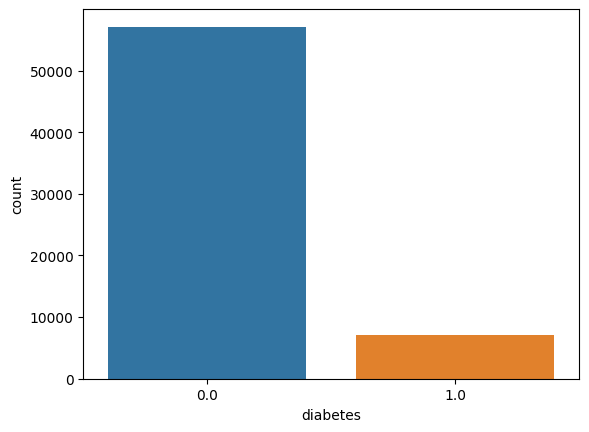

In [ ]:
#Visualization counts of each class in label (Target)
sns.countplot(x="diabetes",data=file)
sns.set(rc={'figure.figsize':(20,20)})

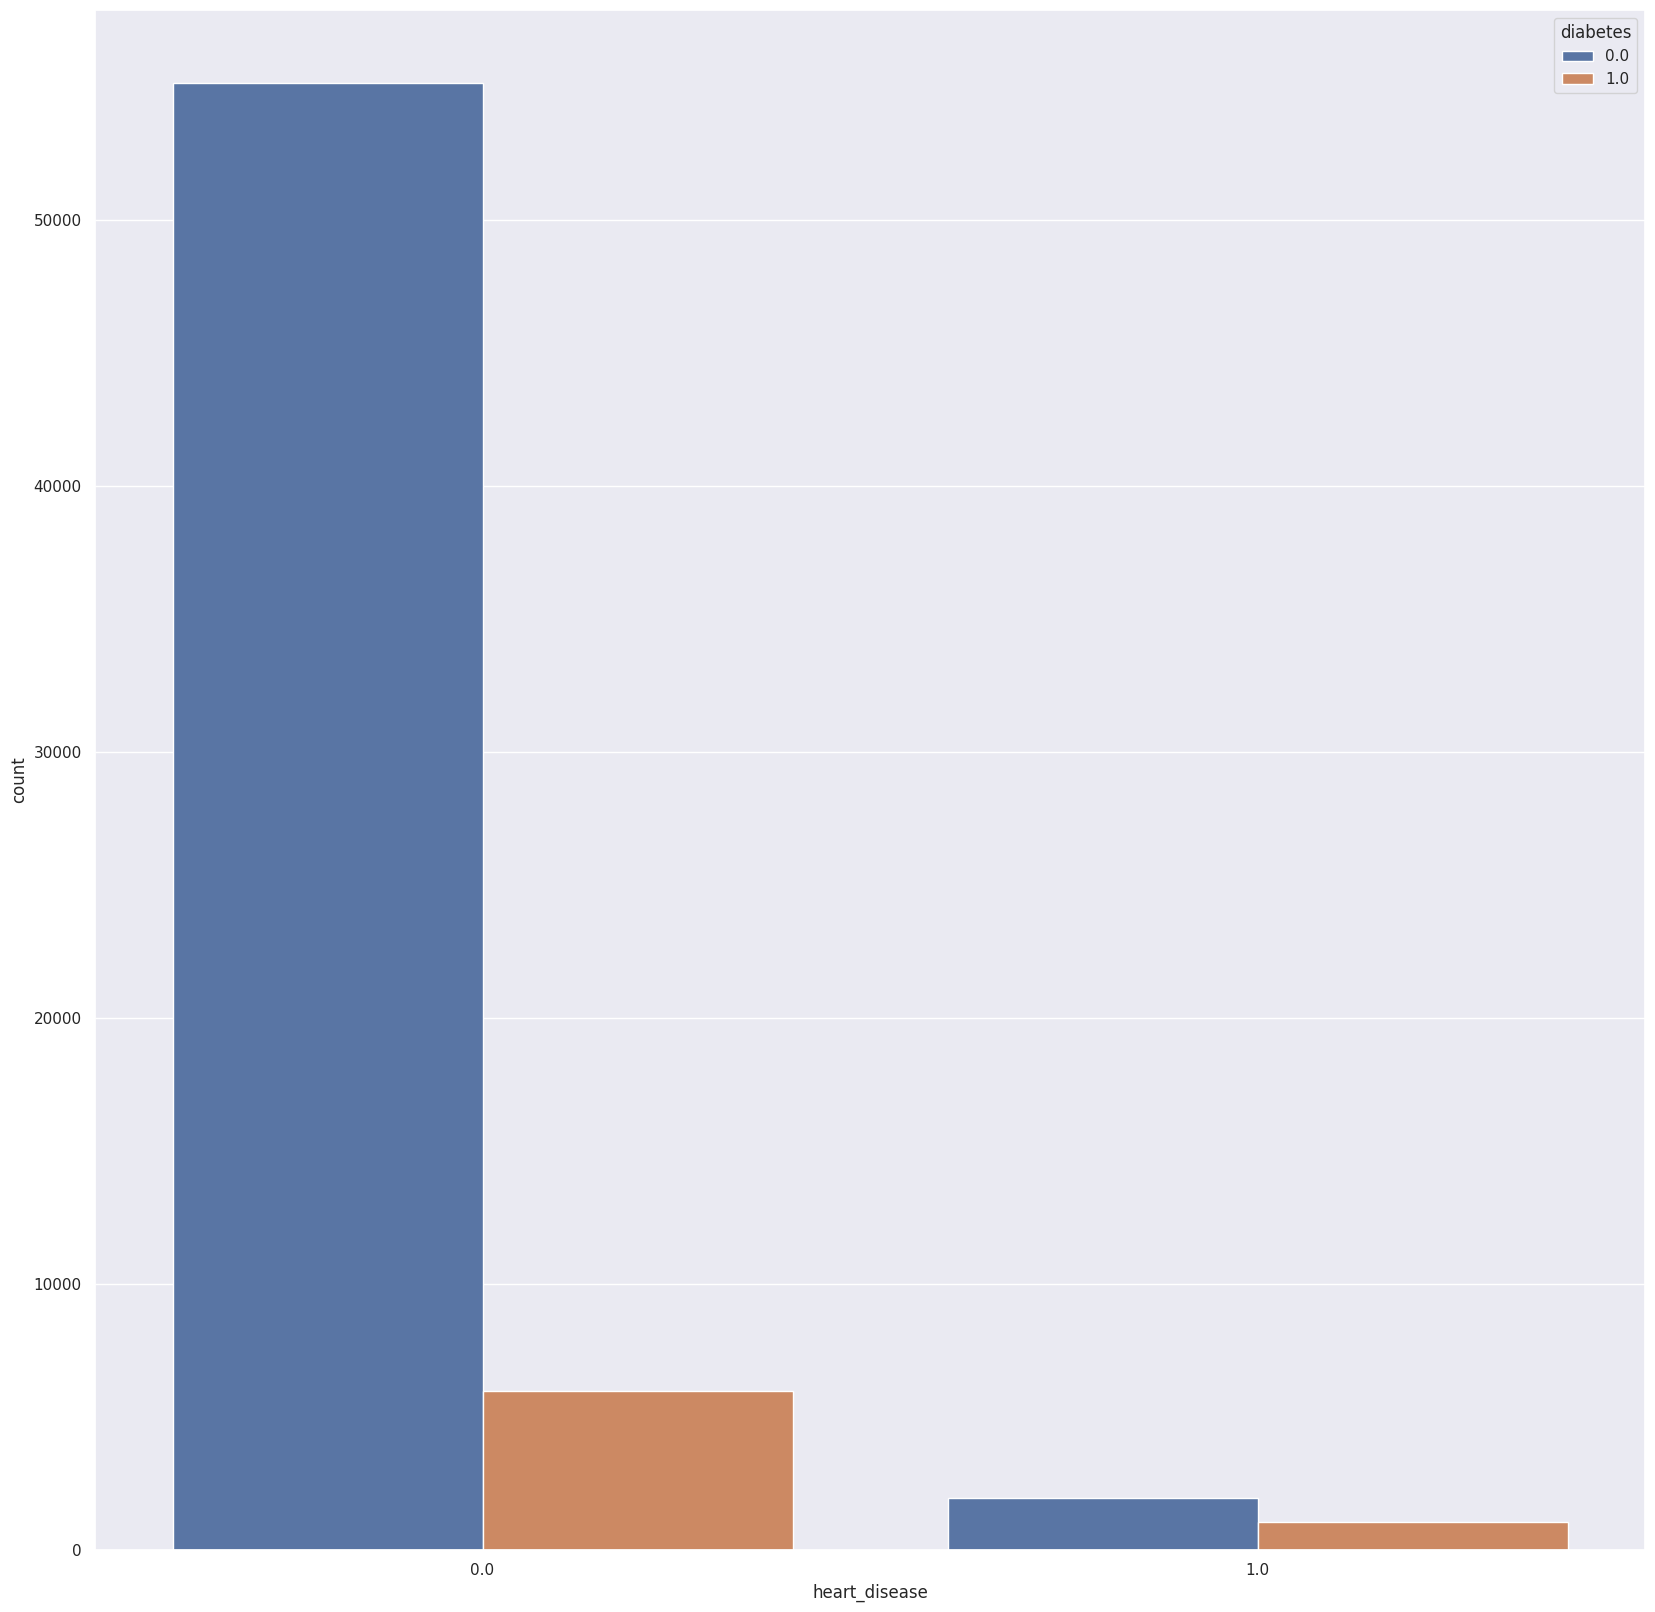

In [ ]:
#Visualization counts of each class in label (Target)
sns.countplot(x="heart_disease",hue="diabetes",data=file)
sns.set(rc={'figure.figsize':(4,4)})

In [ ]:
#convert Categorical data to numrical
le = preprocessing.LabelEncoder()

In [ ]:
cat=file.select_dtypes("object").columns
print(cat)

Index(['gender', 'smoking_history'], dtype='object')


In [ ]:
cat=cat
for x in cat:
  file[x]=le.fit_transform(file[x])

In [ ]:
file.shape

(64152, 9)

In [ ]:
file.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,0.021712,0.027781,0.091752,-0.078320,0.011335,0.028871,0.030177,0.056735
age,0.021712,1.000000,0.252199,0.237955,-0.028287,0.161226,0.115963,0.116956,0.260737
hypertension,0.027781,0.252199,1.000000,0.117200,-0.017014,0.130026,0.086933,0.086610,0.192099
heart_disease,0.091752,0.237955,0.117200,1.000000,-0.039603,0.037748,0.072982,0.078820,0.169677
smoking_history,-0.078320,-0.028287,-0.017014,-0.039603,1.000000,-0.031041,-0.005360,-0.010290,-0.018019
bmi,0.011335,0.161226,0.130026,0.037748,-0.031041,1.000000,0.085030,0.094919,0.204506
HbA1c_level,0.028871,0.115963,0.086933,0.072982,-0.005360,0.085030,1.000000,0.194505,0.438849
blood_glucose_level,0.030177,0.116956,0.086610,0.078820,-0.010290,0.094919,0.194505,1.000000,0.449709
diabetes,0.056735,0.260737,0.192099,0.169677,-0.018019,0.204506,0.438849,0.449709,1.000000


In [ ]:
label=file["diabetes"]

In [ ]:
file=file.drop(["diabetes"],axis=1)

In [ ]:
scaler = MinMaxScaler()
file1=scaler.fit_transform(file)
scaled_df = pd.DataFrame(file1, columns=file.columns)

In [ ]:
scaled_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0.0,1.000000,0.0,1.0,0.75,0.184854,0.563636,0.272727
1,0.5,0.348697,0.0,0.0,0.75,0.210913,0.400000,0.354545
2,0.0,0.448898,0.0,0.0,0.00,0.163567,0.272727,0.340909
3,0.5,0.949900,1.0,1.0,0.00,0.123073,0.236364,0.340909
4,0.0,0.248497,0.0,0.0,0.75,0.210913,0.563636,0.022727
...,...,...,...,...,...,...,...,...
64147,0.0,0.323647,0.0,0.0,0.75,0.296795,0.545455,0.363636
64148,0.0,0.498998,0.0,0.0,0.75,0.374480,0.000000,0.340909
64149,0.5,0.824649,0.0,0.0,0.50,0.217152,0.400000,0.340909
64150,0.0,0.298597,0.0,0.0,0.75,0.310007,0.090909,0.090909


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(file1, label, test_size=0.15,random_state=0,shuffle=True)
y_train.value_counts()

0.0    48539
1.0     5990
Name: diabetes, dtype: int64

In [ ]:
# techniques used to handling imbalanced dataset
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled =ros.fit_resample(X_train, y_train)
X_resampled2, y_resampled2 =rus.fit_resample(X_train, y_train)

In [ ]:
#RandomOverSampler
y_resampled.value_counts()

0.0    48539
1.0    48539
Name: diabetes, dtype: int64

In [ ]:
#RandomUnderSampler
y_resampled2.value_counts()

0.0    5990
1.0    5990
Name: diabetes, dtype: int64

In [ ]:
#Call DecisionTreeClassifier_ algorithm way number two
DTree_modelwithrandomoversampling = DecisionTreeClassifier(max_depth=6)
DTree_modelwithrandomoversampling.fit(X_resampled, y_resampled)

DecisionTreeClassifier(max_depth=6)

In [ ]:
pred_DT=DTree_modelwithrandomoversampling.predict(X_test)

In [ ]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,pred_DT)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, pred_DT)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, pred_DT)))
# But  Classification Report give more details about performance
print(classification_report(y_test, pred_DT))

Accuracy=81.66%

precision_score=36.79%

recall_score=94.58%

              precision    recall  f1-score   support

         0.0       0.99      0.80      0.89      8572
         1.0       0.37      0.95      0.53      1051

    accuracy                           0.82      9623
   macro avg       0.68      0.87      0.71      9623
weighted avg       0.92      0.82      0.85      9623



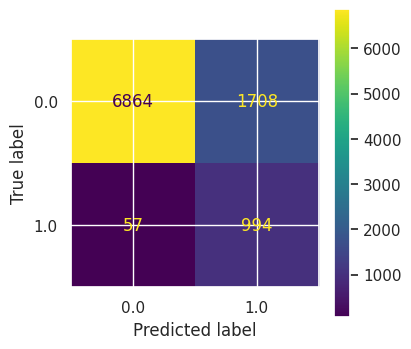

In [ ]:
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
cmp=ConfusionMatrixDisplay.from_estimator(DTree_modelwithrandomoversampling, X_test, y_test,values_format='.222g')

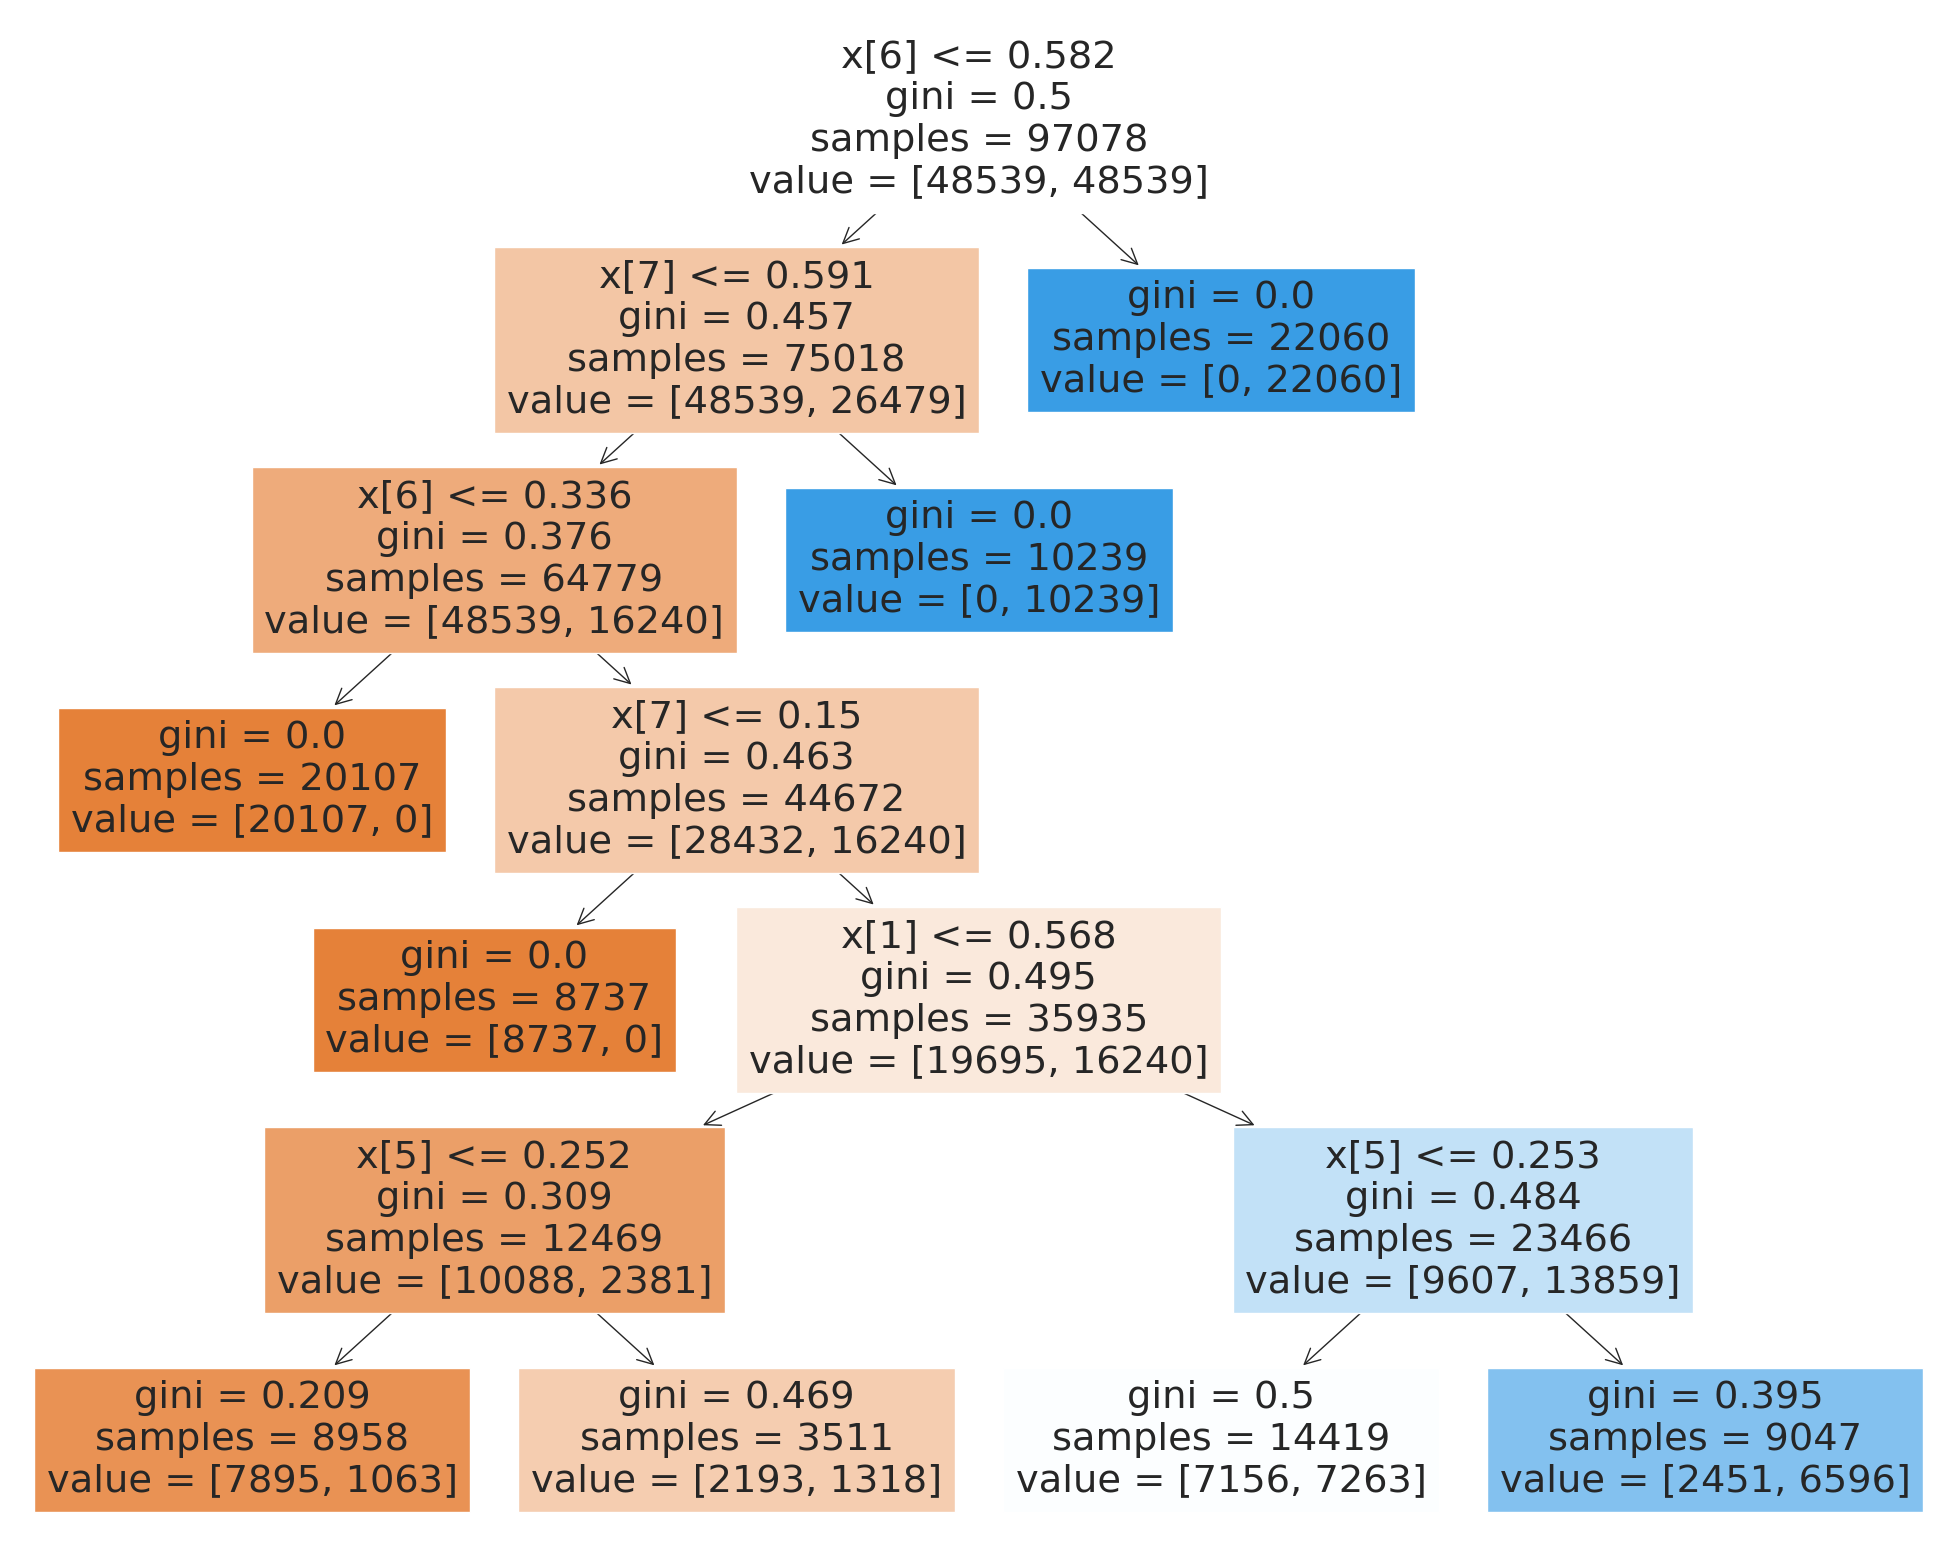

In [ ]:
#This function Plot Tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(DTree_modelwithrandomoversampling,filled=True)
fig.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(30, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_resampled, y_resampled, epochs=6, verbose=1)

Epoch 1/6
3034/3034 [==============================] - 15s 4ms/step - loss: 0.2629 - accuracy: 0.8748
Epoch 2/6
3034/3034 [==============================] - 11s 4ms/step - loss: 0.2564 - accuracy: 0.8779
Epoch 3/6
3034/3034 [==============================] - 11s 4ms/step - loss: 0.2400 - accuracy: 0.8844
Epoch 4/6
3034/3034 [==============================] - 16s 5ms/step - loss: 0.2307 - accuracy: 0.8870
Epoch 5/6
3034/3034 [==============================] - 12s 4ms/step - loss: 0.2280 - accuracy: 0.8873
Epoch 6/6
3034/3034 [==============================] - 15s 5ms/step - loss: 0.2255 - accuracy: 0.8884


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred=model.predict(X_test)

301/301 [==============================] - 1s 2ms/step


In [ ]:
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, pred))

In [ ]:
# Accuracy score is the simplest way to evaluate
print("Accuracy="+'{:.2%}\n'.format(accuracy_score( y_test,seq_predictions)))
# precision_score score is the simplest way to evaluate
print("precision_score="+'{:.2%}\n'.format(precision_score(y_test, seq_predictions)))
# recall_score score is the simplest way to evaluate
print("recall_score="+'{:.2%}\n'.format(recall_score(y_test, seq_predictions)))
# But  Classification Report give more details about performance
print(classification_report(y_test, seq_predictions))

Accuracy=85.08%

precision_score=41.85%

recall_score=94.10%

              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      8572
         1.0       0.42      0.94      0.58      1051

    accuracy                           0.85      9623
   macro avg       0.70      0.89      0.74      9623
weighted avg       0.93      0.85      0.87      9623



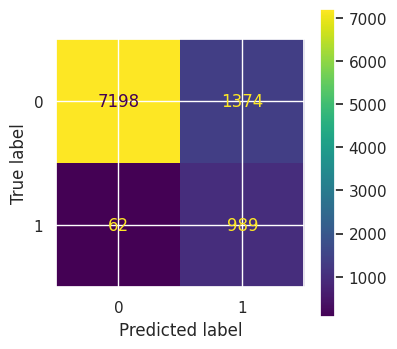

In [ ]:
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
cm = confusion_matrix(y_test, seq_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()